In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
import os

In [3]:
# Step 1: Load the dataset

file_path = "/content/drive/MyDrive/Data Science Projects/Beginner/Notebook/Datasets/turkiye-student-evaluation.csv"
data = pd.read_csv(file_path)
output_path = "/content/drive/MyDrive/Data Science Projects/App/app/static"
os.makedirs(output_path, exist_ok=True)

In [4]:
# Step 2: Explore the data

print("Data Head:\n", data.head())
print("\nData Info:\n", data.info())
print("\nData Description:\n", data.describe())


Data Head:
    instr  class  nb.repeat  attendance  difficulty  Q1  Q2  Q3  Q4  Q5  ...  \
0      1      2          1           0           4   3   3   3   3   3  ...   
1      1      2          1           1           3   3   3   3   3   3  ...   
2      1      2          1           2           4   5   5   5   5   5  ...   
3      1      2          1           1           3   3   3   3   3   3  ...   
4      1      2          1           0           1   1   1   1   1   1  ...   

   Q19  Q20  Q21  Q22  Q23  Q24  Q25  Q26  Q27  Q28  
0    3    3    3    3    3    3    3    3    3    3  
1    3    3    3    3    3    3    3    3    3    3  
2    5    5    5    5    5    5    5    5    5    5  
3    3    3    3    3    3    3    3    3    3    3  
4    1    1    1    1    1    1    1    1    1    1  

[5 rows x 33 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5820 entries, 0 to 5819
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype
---  ------      ---

In [5]:
# Step 3: Column details

print("\nColumn Details:")
for col in data.columns:
    print(f"Column: {col}, Type: {data[col].dtype}, Unique values: {data[col].nunique()}")


Column Details:
Column: instr, Type: int64, Unique values: 3
Column: class, Type: int64, Unique values: 13
Column: nb.repeat, Type: int64, Unique values: 3
Column: attendance, Type: int64, Unique values: 5
Column: difficulty, Type: int64, Unique values: 5
Column: Q1, Type: int64, Unique values: 5
Column: Q2, Type: int64, Unique values: 5
Column: Q3, Type: int64, Unique values: 5
Column: Q4, Type: int64, Unique values: 5
Column: Q5, Type: int64, Unique values: 5
Column: Q6, Type: int64, Unique values: 5
Column: Q7, Type: int64, Unique values: 5
Column: Q8, Type: int64, Unique values: 5
Column: Q9, Type: int64, Unique values: 5
Column: Q10, Type: int64, Unique values: 5
Column: Q11, Type: int64, Unique values: 5
Column: Q12, Type: int64, Unique values: 5
Column: Q13, Type: int64, Unique values: 5
Column: Q14, Type: int64, Unique values: 5
Column: Q15, Type: int64, Unique values: 5
Column: Q16, Type: int64, Unique values: 5
Column: Q17, Type: int64, Unique values: 5
Column: Q18, Type: in

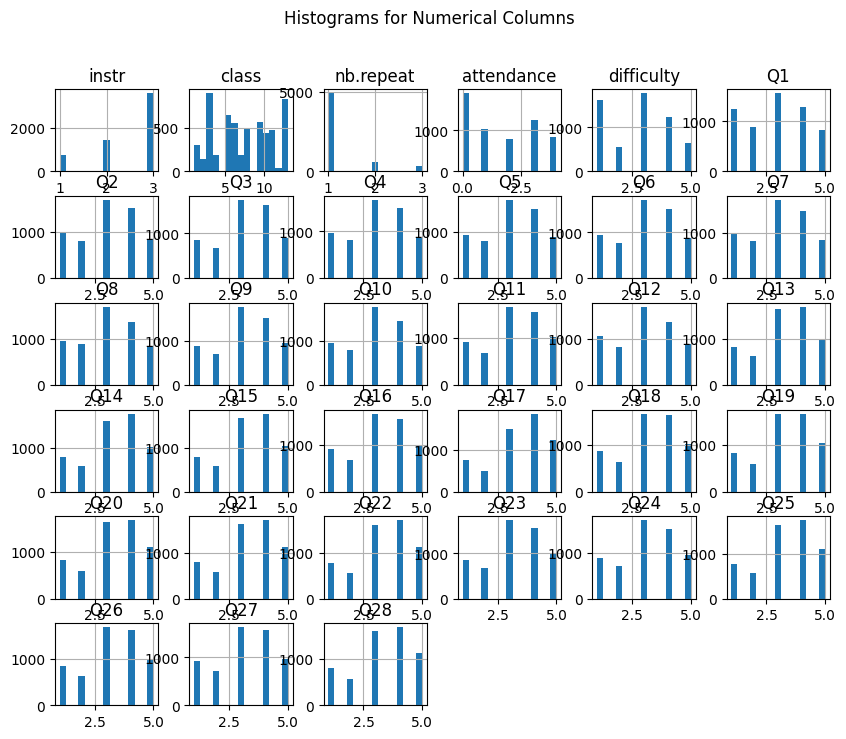

In [6]:
# Step 4: Visualize histograms for each numerical column

data.hist(bins=15, figsize=(10, 8))
plt.suptitle("Histograms for Numerical Columns")
# plt.show()
plt.savefig(os.path.join(output_path, "turkiye_histograms.png"))

In [7]:
# Step 5: Handle missing values

# Display the number of missing values per column
print("Number of missing values in each column before filling:")
print(data.isnull().sum())

# Save the mean values for numerical columns with missing values
mean_values_with_na = data.mean(numeric_only=True)

# Save the mode values for categorical columns with missing values
mode_values_with_na = data.mode().iloc[0]

# Fill missing values with the mean of numerical columns and mode of categorical columns
for column in data.columns:
    if data[column].dtype == 'object':  # Categorical columns
        if data[column].isnull().any():
            data[column].fillna(mode_values_with_na[column], inplace=True)
    else:  # Numerical columns
        if data[column].isnull().any():
            data[column].fillna(mean_values_with_na[column], inplace=True)

# Display the mean/mode values used to fill each column with missing values
print("\nValues used to fill columns with missing values:")
for column in data.columns:
    if data[column].dtype == 'object':  # Categorical columns
        if column in mode_values_with_na:
            print(f"{column}: {mode_values_with_na[column]}")
    else:  # Numerical columns
        if column in mean_values_with_na:
            print(f"{column}: {mean_values_with_na[column]}")

Number of missing values in each column before filling:
instr         0
class         0
nb.repeat     0
attendance    0
difficulty    0
Q1            0
Q2            0
Q3            0
Q4            0
Q5            0
Q6            0
Q7            0
Q8            0
Q9            0
Q10           0
Q11           0
Q12           0
Q13           0
Q14           0
Q15           0
Q16           0
Q17           0
Q18           0
Q19           0
Q20           0
Q21           0
Q22           0
Q23           0
Q24           0
Q25           0
Q26           0
Q27           0
Q28           0
dtype: int64

Values used to fill columns with missing values:
instr: 2.4855670103092784
class: 7.276288659793814
nb.repeat: 1.2140893470790377
attendance: 1.6756013745704468
difficulty: 2.783505154639175
Q1: 2.9298969072164947
Q2: 3.0738831615120277
Q3: 3.178694158075601
Q4: 3.082474226804124
Q5: 3.1058419243986255
Q6: 3.107388316151203
Q7: 3.066323024054983
Q8: 3.0419243986254294
Q9: 3.165979381443299
Q10: 3.09


Outliers Detected for nb.repeat:
      instr  class  nb.repeat  attendance  difficulty  Q1  Q2  Q3  Q4  Q5  \
39        1      2          3           1           3   3   3   3   3   3   
42        1      2          2           1           3   2   3   3   3   2   
47        1      2          2           1           3   4   4   4   4   4   
72        1      2          3           1           5   3   3   3   3   3   
93        1      2          3           1           1   1   1   1   1   5   
...     ...    ...        ...         ...         ...  ..  ..  ..  ..  ..   
5794      3     13          2           0           3   2   1   1   1   1   
5800      3     13          2           3           2   4   4   4   4   4   
5805      3     13          2           1           2   1   1   1   1   1   
5806      3     13          2           0           3   4   4   4   4   4   
5813      3     13          2           3           4   2   3   3   3   3   

      ...  Q19  Q20  Q21  Q22  Q23  Q24  

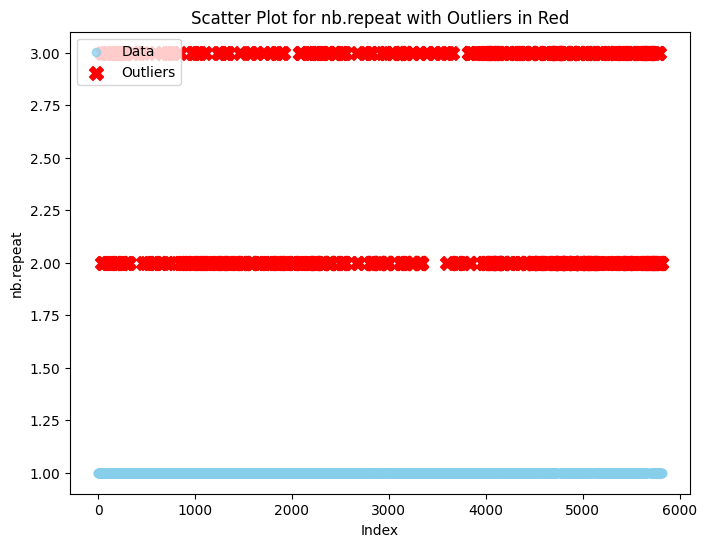

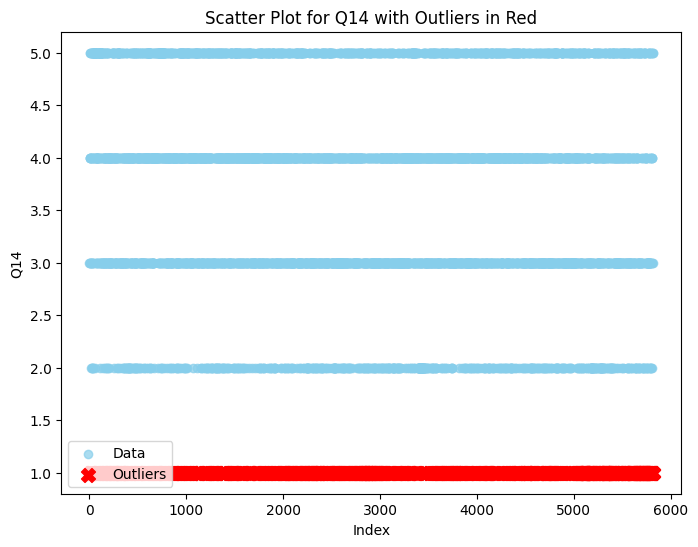

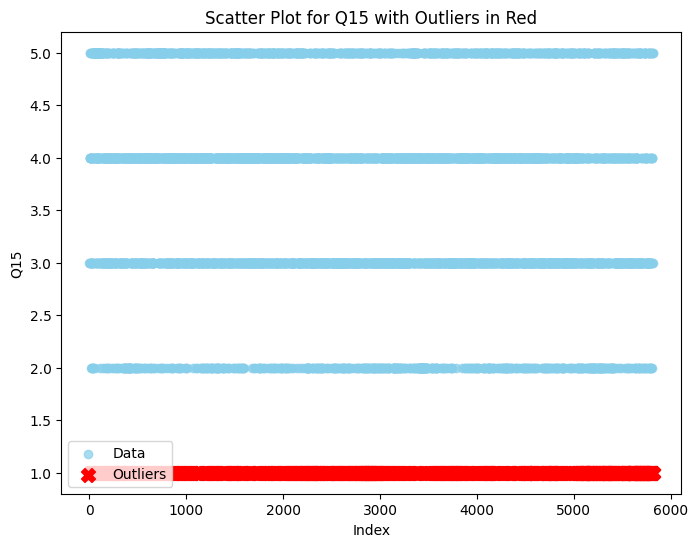

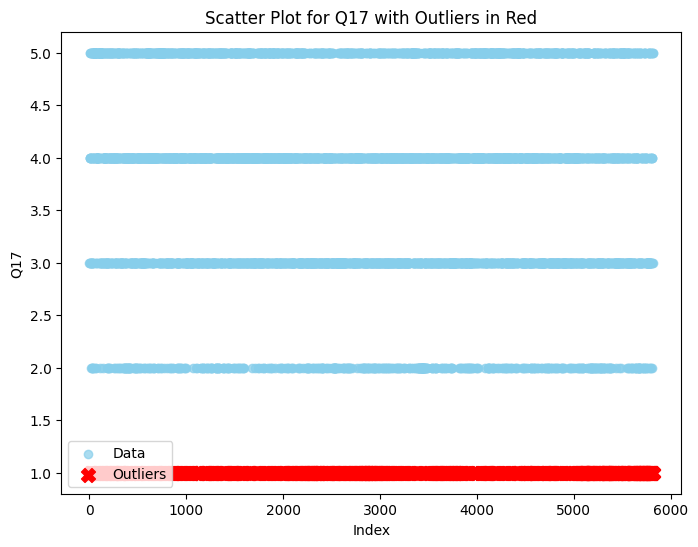

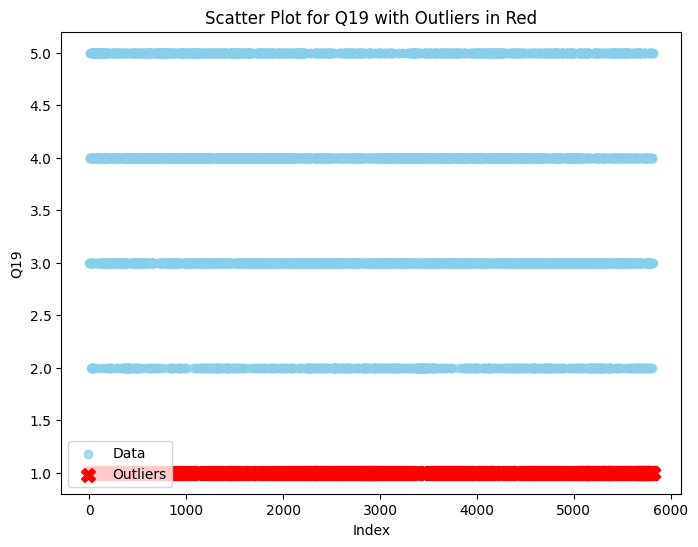

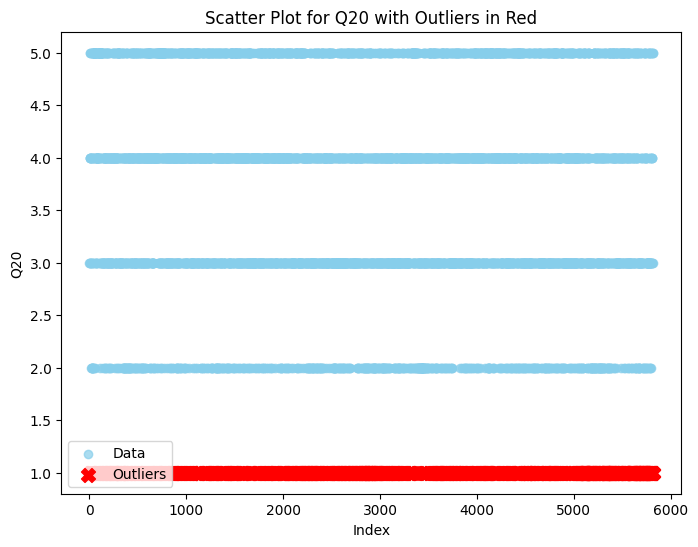

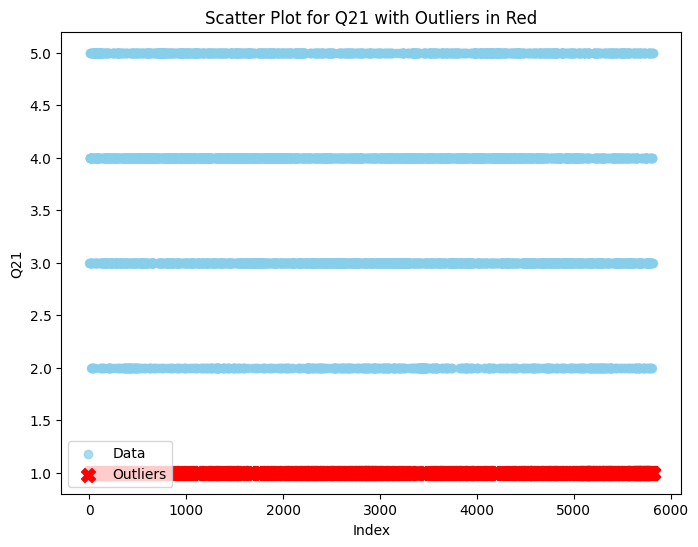

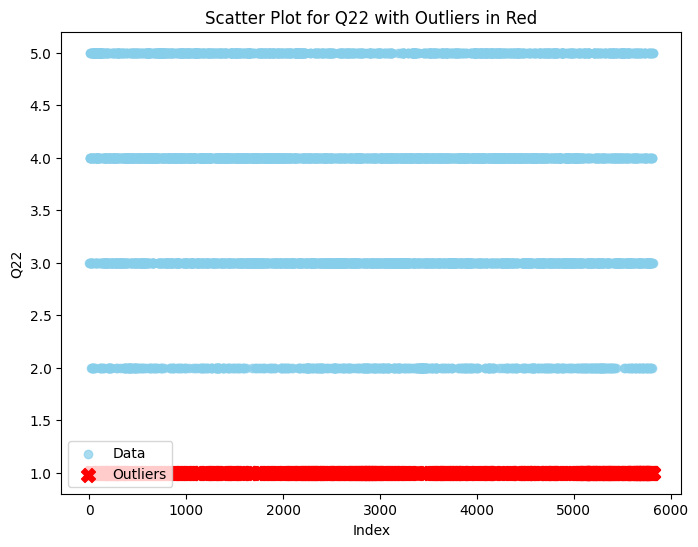

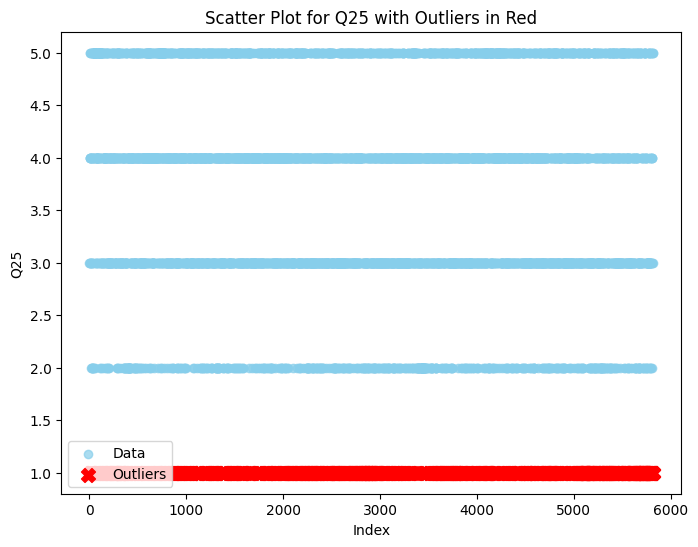

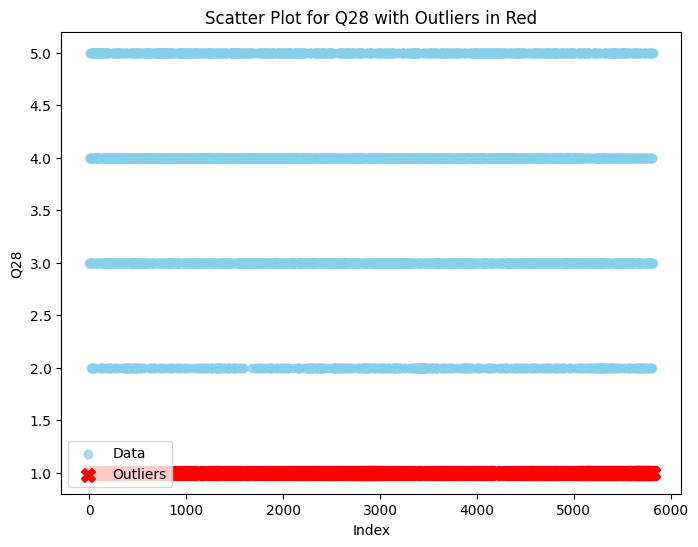

In [8]:
# Step 6: Identify and remove outliers using IQR (Interquartile Range)

# Identifying outliers for each numeric column
outlier_columns = []
outliers_dict = {}

# Iterate over each numeric column in the dataset
for feature in data.select_dtypes(include=[np.number]).columns:
    # Calculate Q1 (25th percentile), Q3 (75th percentile), and IQR (Interquartile Range)
    Q1 = data[feature].quantile(0.25)  # 25th percentile
    Q3 = data[feature].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile Range (difference between Q3 and Q1)

    # Identify outliers using the IQR rule: values lower than Q1 - 1.5 * IQR or higher than Q3 + 1.5 * IQR
    outlier_mask = (data[feature] < (Q1 - 1.5 * IQR)) | (data[feature] > (Q3 + 1.5 * IQR))

    # If there are any outliers for this feature, store them in the outliers_dict
    if outlier_mask.any():  # If there is at least one outlier
        outliers_dict[feature] = data[outlier_mask]  # Store outliers in the dictionary
        outlier_columns.append(feature)  # Add the feature name to the outlier_columns list

# Generate scatter plots only for the columns that contain outliers
for feature in outlier_columns:
    plt.figure(figsize=(8, 6))  # Create a figure for the scatter plot

    # Plot all data points (excluding outliers) for the feature
    non_outliers = data[~outlier_mask]  # Data without outliers
    plt.scatter(non_outliers.index, non_outliers[feature], color='skyblue', label="Data", alpha=0.7)

    # Plot the outliers in red
    outliers = outliers_dict[feature]  # Get the outliers for the current feature
    plt.scatter(outliers.index, outliers[feature], color='red', label="Outliers", s=100, marker='X')

    # Set title and labels for the plot
    plt.title(f"Scatter Plot for {feature} with Outliers in Red")
    plt.xlabel('Index')
    plt.ylabel(feature)
    plt.legend()
    # plt.show()
    plot_filename = f"turkiye_scatter_{feature}.png"  # Use feature name in the file
    plt.savefig(os.path.join(output_path, plot_filename))

    # Print the outliers detected for the current feature
    print(f"\nOutliers Detected for {feature}:")
    print(outliers)

In [ ]:
# Visualize the cleaned data with a pairplot (after removing outliers)
sns.pairplot(data, hue='class', plot_kws={'alpha': 0.5})
plt.suptitle("Pairplot of Features with class Class Labels (Including Outliers)", y=1.02)
# plt.show()
# plt.savefig(os.path.join(output_path, "turkiye_outliers_class.png"))

# Visualize the cleaned data with a pairplot (after removing outliers)
sns.pairplot(data, hue='nb.repreat', plot_kws={'alpha': 0.5})
plt.suptitle("Pairplot of Features with nb.repeat Class Labels (Including Outliers)", y=1.02)
# plt.show()
# plt.savefig(os.path.join(output_path, "turkiye_outliers_repeat.png"))

# Visualize the cleaned data with a pairplot (after removing outliers)
sns.pairplot(data, hue='attendance', plot_kws={'alpha': 0.5})
plt.suptitle("Pairplot of Features with attendance Class Labels (Including Outliers)", y=1.02)
# plt.show()
# plt.savefig(os.path.join(output_path, "turkiye_outliers_attendance.png"))

# Visualize the cleaned data with a pairplot (after removing outliers)
sns.pairplot(data, hue='difficulty', plot_kws={'alpha': 0.5})
plt.suptitle("Pairplot of Features with difficulty Class Labels (Including Outliers)", y=1.02)
# plt.show()
# plt.savefig(os.path.join(output_path, "turkiye_outliers_difficulty.png"))

# Visualize the cleaned data with a pairplot (after removing outliers)
sns.pairplot(data, hue='Q1', plot_kws={'alpha': 0.5})
plt.suptitle("Pairplot of Features with Q1 Class Labels (Including Outliers)", y=1.02)
# plt.show()
# plt.savefig(os.path.join(output_path, "turkiye_outliers_q1.png"))

In [9]:
# Remove the outliers from the dataset

cleaned_data = data.copy()

# Loop through outlier columns to remove outliers
for feature in outlier_columns:
    outliers = outliers_dict[feature]  # Get outliers for the current feature
    cleaned_data = cleaned_data[~cleaned_data.index.isin(outliers.index)]  # Remove rows with outliers

In [ ]:
# Visualize the cleaned data with a pairplot (after removing outliers)
sns.pairplot(cleaned_data, hue='class', plot_kws={'alpha': 0.5})
plt.suptitle("Pairplot of Features with class Class Labels (After Removing Outliers)", y=1.02)
# plt.show()
plt.savefig(os.path.join(output_path, "turkiye_removed_outliers_class.png"))

# Visualize the cleaned data with a pairplot (after removing outliers)
sns.pairplot(cleaned_data, hue='nb.repreat', plot_kws={'alpha': 0.5})
plt.suptitle("Pairplot of Features with nb.repeat Class Labels (After Removing Outliers)", y=1.02)
# plt.show()
# plt.savefig(os.path.join(output_path, "turkiye_removed_outliers_repeat.png"))

# Visualize the cleaned data with a pairplot (after removing outliers)
sns.pairplot(cleaned_data, hue='attendance', plot_kws={'alpha': 0.5})
plt.suptitle("Pairplot of Features with attendance Class Labels (After Removing Outliers)", y=1.02)
# plt.show()
# plt.savefig(os.path.join(output_path, "turkiye_removed_outliers_attendance.png"))

# Visualize the cleaned data with a pairplot (after removing outliers)
sns.pairplot(cleaned_data, hue='difficulty', plot_kws={'alpha': 0.5})
plt.suptitle("Pairplot of Features with difficulty Class Labels (After Removing Outliers)", y=1.02)
# plt.show()
# plt.savefig(os.path.join(output_path, "turkiye_removed_outliers_difficulty.png"))

# Visualize the cleaned data with a pairplot (after removing outliers)
sns.pairplot(cleaned_data, hue='Q1', plot_kws={'alpha': 0.5})
plt.suptitle("Pairplot of Features with Q1 Class Labels (After Removing Outliers)", y=1.02)
# plt.show()
# plt.savefig(os.path.join(output_path, "turkiye_removed_outliers_q1.png"))

In [10]:
# Step 8: Preprocess the data

# Encode the target variable
label_encoder = LabelEncoder()
data['difficulty'] = label_encoder.fit_transform(data['difficulty'])

In [11]:
# Step 9: Handle non-numeric columns in X

# Convert categorical features to numeric using one-hot encoding or label encoding
# Here we use LabelEncoder for each categorical column (excluding the target 'Loan_Status')
for column in data.select_dtypes(include=['object']).columns:
    if column != 'difficulty':  # Avoid encoding the target variable
        label_encoder = LabelEncoder()
        data[column] = label_encoder.fit_transform(data[column])

In [13]:
# Step 10: Define features (X) and target (y)

X = data.drop(columns=['difficulty'])  # Features
y = data['difficulty']  # Target variable

# Step 11: Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 12: Feature scaling

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [14]:
# Step 12: Model selection and training

# Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Decision Tree
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Random Forest
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [15]:
# Step 13: Model evaluation

models = {
    "Logistic Regression": logistic_model,
    "Decision Tree": tree_model,
    "Random Forest": rf_model
}


In [16]:
# Step 14: Display metrics

# Initialize dictionaries for storing metrics
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
conf_matrices = {}
class_reports = {}

# Calculate metrics for each model
for model_name, model in models.items():
    pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred, average="weighted")
    recall = recall_score(y_test, pred, average="weighted")
    f1 = f1_score(y_test, pred, average="weighted")

    # Append metric scores
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

    # Store confusion matrices and classification reports if needed
    conf_matrices[model_name] = confusion_matrix(y_test, pred)
    class_reports[model_name] = classification_report(y_test, pred)


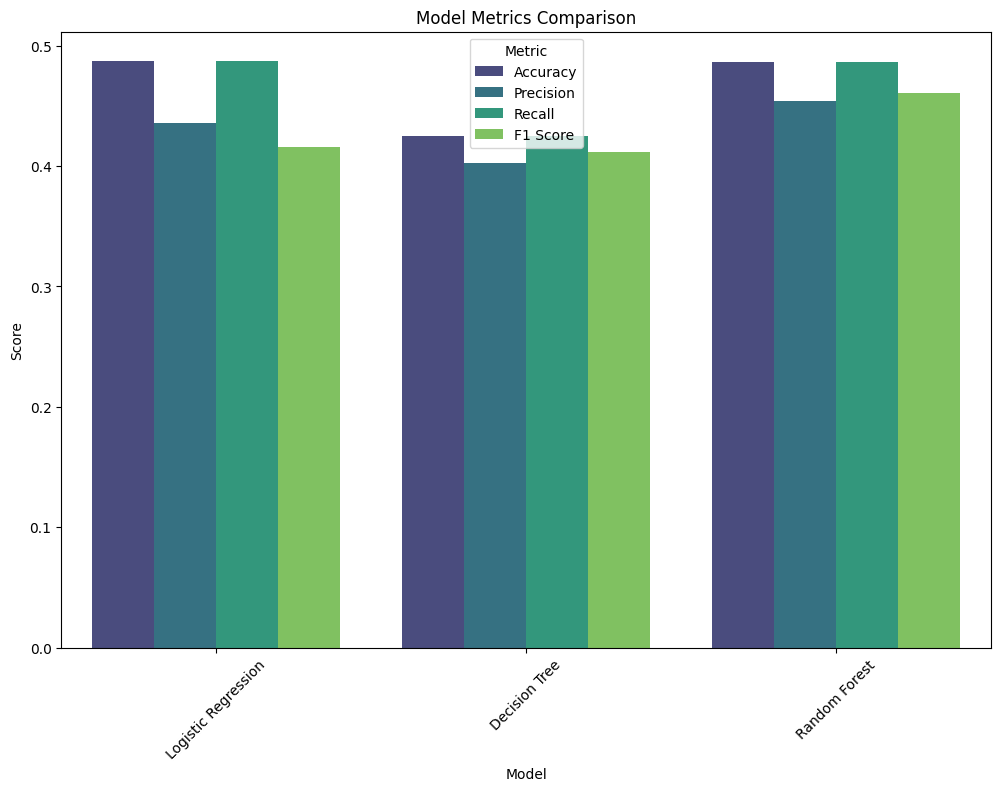

In [19]:
metrics_df  = pd.DataFrame({
    "Model": list(models.keys()),
    "Accuracy": accuracy_scores,
    "Precision": precision_scores,
    "Recall": recall_scores,
    "F1 Score": f1_scores
})

# Melt the DataFrame for easier plotting with Seaborn
metrics_melted = metrics_df.melt(id_vars="Model", var_name="Metric", value_name="Score")

# Plotting the metrics
plt.figure(figsize=(12, 8))
sns.barplot(data=metrics_melted, x="Model", y="Score", hue="Metric", palette="viridis")
plt.title("Model Metrics Comparison")
plt.xlabel("Model")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(title="Metric")
# plt.show()
plt.savefig(os.path.join(output_path, "turkiye_metrics.png"))

In [20]:
# Display classification reports
for model_name, report in class_reports.items():
    print(f"\nClassification Report for {model_name}:\n{report}")


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.58      0.84      0.69       310
           1       0.00      0.00      0.00       104
           2       0.43      0.71      0.54       366
           3       0.45      0.12      0.20       233
           4       0.42      0.13      0.19       151

    accuracy                           0.49      1164
   macro avg       0.38      0.36      0.32      1164
weighted avg       0.44      0.49      0.42      1164


Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.61      0.71      0.66       310
           1       0.15      0.12      0.13       104
           2       0.41      0.46      0.44       366
           3       0.34      0.31      0.33       233
           4       0.21      0.15      0.18       151

    accuracy                           0.43      1164
   macro avg       0.35      0.35      0.